In [64]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import math

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import normalize, scale

In [65]:
# import math lib
from math import pi

# import Qiskit
from qiskit import Aer, IBMQ, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [66]:
# To use local qasm simulator
backend = Aer.get_backend('qasm_simulator')

In [103]:
def get_Distance(x,y,type='angle'):
    if type == 'angle':
        complexes_x = x[0] + 1j*x[1]
        complexes_y= y[0] + 1j*y[1]
        theta_1 = np.angle(complexes_x)
        theta_2 = np.angle(complexes_y)
    
        # create Quantum Register called "qr" with 3 qubits
        qr = QuantumRegister(3, name="qr")
        # create Classical Register called "cr" with 5 bits
        cr = ClassicalRegister(3, name="cr")

        # Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
        # and your Classical Register "cr"
        qc = QuantumCircuit(qr, cr, name="k_means")

        qc.h(qr[0])
        qc.h(qr[1])
        qc.h(qr[2])
        qc.u3(theta_1, pi, pi, qr[1])
        qc.u3(theta_2, pi, pi, qr[2])
        qc.cswap(qr[0], qr[1], qr[2])
        qc.h(qr[0])

        qc.measure(qr[0], cr[0])
        qc.reset(qr)
    elif type == 'probability':
        # create Quantum Register called "qr" with 3 qubits
        qr = QuantumRegister(3, name="qr")
        # create Classical Register called "cr" with 5 bits
        cr = ClassicalRegister(3, name="cr")

        # Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
        # and your Classical Register "cr"
        qc = QuantumCircuit(qr, cr, name="k_means")
        qc.initialize(x,1)
        qc.initialize(y,2)

        qc.h(qr[0])
        qc.cswap(qr[0], qr[1], qr[2])
        qc.h(qr[0])

        qc.measure(qr[0], cr[0])
        qc.reset(qr)

    #print('----before run----')
    job = execute(qc,backend=backend, shots=1024)
    #print('----after run----')
    result = job.result()
    data = result.get_counts()
    
    if len(data)==1:
        return 0.0
    else:
        return data['001']/1024.0
    
    

In [90]:
def get_data(n,k,std):
    data_1 = pd.read_csv('datos.csv')
    X = data_1.values[:,:2]
    y = data_1.values[:,2]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)
    points = X_train
    centers = y_train
    
    return points,centers

In [91]:
def draw_plot(points,centers,label=True):
    if label==False:
        plt.scatter(points[:,0], points[:,1])
    else:
        plt.scatter(points[:,0], points[:,1], c=centers, cmap='viridis')
    plt.show()

In [92]:
def plot_centroids(centers):
    plt.scatter(centers[:,0], centers[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

In [93]:
def initialize_centers(points,k):
    return points[np.random.randint(points.shape[0],size=k),:]

In [94]:
def get_distance(p1, p2):
    return np.sqrt(np.sum((p1-p2)*(p1-p2)))

In [95]:
def find_nearest_neighbour(points,centroids,type='angle'):
    
    n = len(points)
    k = centroids.shape[0]
    centers = np.zeros(n)
    
    for i in range(n):
        min_dis = 10000
        ind = 0
        for j in range(k):
            
            temp_dis = get_Distance(points[i,:],centroids[j,:],type)
            
            if temp_dis < min_dis:
                min_dis = temp_dis
                ind = j
        centers[i] = ind
    
    return centers

In [96]:
def find_centroids(points,centers):
    n = len(points)
    k = int(np.max(centers))+1
   
    centroids = np.zeros([k,2])
    
    for i in range(k):
        #print(points[centers==i])
        centroids[i,:] = np.average(points[centers==i])
        
    return centroids

In [105]:
def preprocess(points,type='angle'):
    #n = len(points)
    #x = 30.0*np.sqrt(2)
    #for i in range(n):
    #    points[i,:]+=15
    #    points[i,:]/=x
    #print(points)
    #points_1 = points[:,0]
    #print(points_1)
    #normalized_1 = normalize(points_1)
    #print("normalized",normalized_1)
    #points_2 = points[:,1]
    #print(points_2)
    print(points)
    if type == 'angle': points = scale(points)
    elif type == 'probability': points = normalize(points)
    #scaler = StandardScaler().fit(points)
    #points = scaler.transform(points)
    #transformer = RobustScaler().fit(X)
    print(points)
    return points

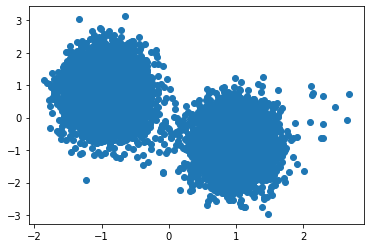

In [80]:
draw_plot(points,o_centers,label=False)

[[-1.85135701e+14  3.56539353e+13]
 [ 5.71558450e+14 -8.48424082e+13]
 [ 5.17593126e+14 -1.23153770e+14]
 ...
 [ 6.64217840e+14 -9.94032348e+13]
 [ 4.84157718e+14 -1.62091958e+14]
 [-3.32763199e+13  2.76086672e+14]]
[[-1.15180786  0.21731495]
 [ 1.02684763 -0.54995979]
 [ 0.87147197 -0.79391192]
 ...
 [ 1.2936303  -0.64267758]
 [ 0.77520555 -1.04185545]
 [-0.71457801  1.74829886]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


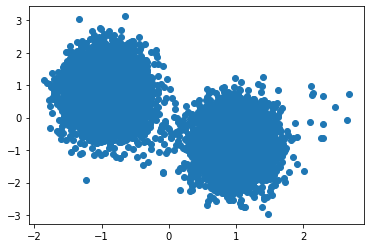

<ipython-input-67-1d179a54de4d>:19: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  qc.u3(theta_1, pi, pi, qr[1])
<ipython-input-67-1d179a54de4d>:20: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  qc.u3(theta_2, pi, pi, qr[2])


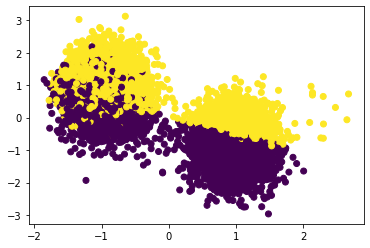

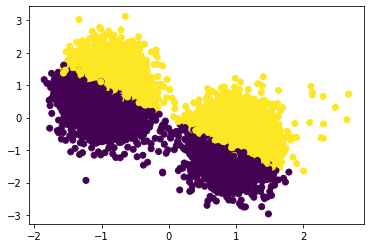

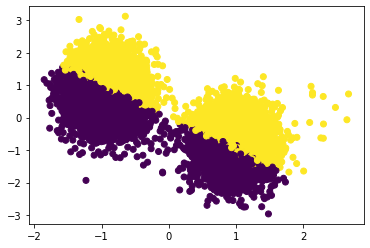

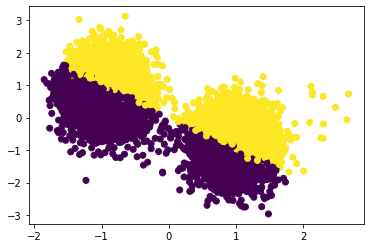

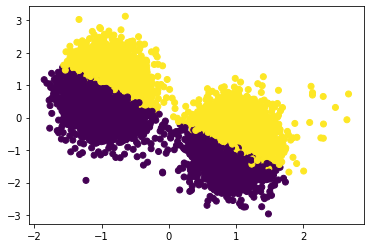

In [81]:
n = 16384      # number of data points
k = 2        # Number of centers
std = 1     # std of datapoints

points,o_centers = get_data(n,k,std)       #dataset

points = preprocess(points)                # Normalize dataset
plt.figure()                                  
draw_plot(points,o_centers,label=False)

centroids = initialize_centers(points,k)   # Intialize centroids


# run k-means algorithm
for i in range(5):
    
    centers = find_nearest_neighbour(points,centroids)       # find nearest centers
    plt.figure()
    draw_plot(points,centers)
    #plot_centroids(centroids)
    centroids = find_centroids(points,centers)               # find centroids

In [84]:
data = pd.read_csv('datos.csv')
y = data.values[:,2]

In [ ]:
print(centers)
np.asarray([centers[i] == y[i] for i in range(len(centers))]).sum()/len(centers)

[0. 1. 0. ... 1. 0. 1.]


0.5856295779560516

[[-1.85135701e+14  3.56539353e+13]
 [ 5.71558450e+14 -8.48424082e+13]
 [ 5.17593126e+14 -1.23153770e+14]
 ...
 [ 6.64217840e+14 -9.94032348e+13]
 [ 4.84157718e+14 -1.62091958e+14]
 [-3.32763199e+13  2.76086672e+14]]
[[-0.98195633  0.18910781]
 [ 0.9891615  -0.1468316 ]
 [ 0.97284122 -0.23147345]
 ...
 [ 0.98898641 -0.14800634]
 [ 0.94826762 -0.31747208]
 [-0.11966248  0.99281463]]


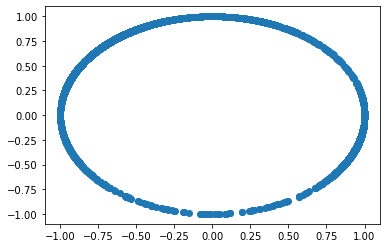

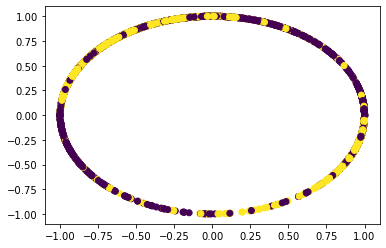

In [107]:
n = 16384      # number of data points
k = 2        # Number of centers
std = 1     # std of datapoints

points_1,o_centers_1 = get_data(n,k,std)       #dataset

points_1 = preprocess(points_1,type='probability')                # Normalize dataset
plt.figure()                                  
draw_plot(points_1,o_centers_1,label=False)

centroids_1 = initialize_centers(points_1,k)   # Intialize centroids


# run k-means algorithm
for i in range(1):
    
    centers_1 = find_nearest_neighbour(points_1,centroids_1,type='probability')       # find nearest centers
    plt.figure()
    draw_plot(points_1,centers_1)
    #plot_centroids(centroids)
    centroids_1 = find_centroids(points_1,centers_1)               # find centroids

In [ ]:
print(centers_1)
np.asarray([centers_1[i] == y[i] for i in range(len(centers_1))]).sum()/len(centers_1)

[1. 0. 1. ... 1. 1. 0.]


0.5212765957446809